

```
Installing my libraries
```



In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


Downloading and Importing the Dataset

In [2]:
import kagglehub

# Downloading dataset
path = kagglehub.dataset_download("vinicius150987/titanic3")

print("Path to dataset files:", path)

100%|██████████| 277k/277k [00:00<00:00, 44.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vinicius150987/titanic3/versions/1


TASK 1

Initially exploring the data



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading our dataset
file_path = "titanic3.xls"
df = pd.read_excel(file_path)

df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
# checking dataset shape (number of rows and columns)
print(f"dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# checking column names and data types
print("\ncolumn names and data types:")
print(df.dtypes)

# Check for missing values
print("\nmissing values:")
print(df.isnull().sum())


dataset contains 1309 rows and 14 columns

column names and data types:
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

missing values:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [16]:
# Summary stats for columns with numerical values
df.describe()



,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:

# summary stats of categorical variables
df.describe(include=['object'])


,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


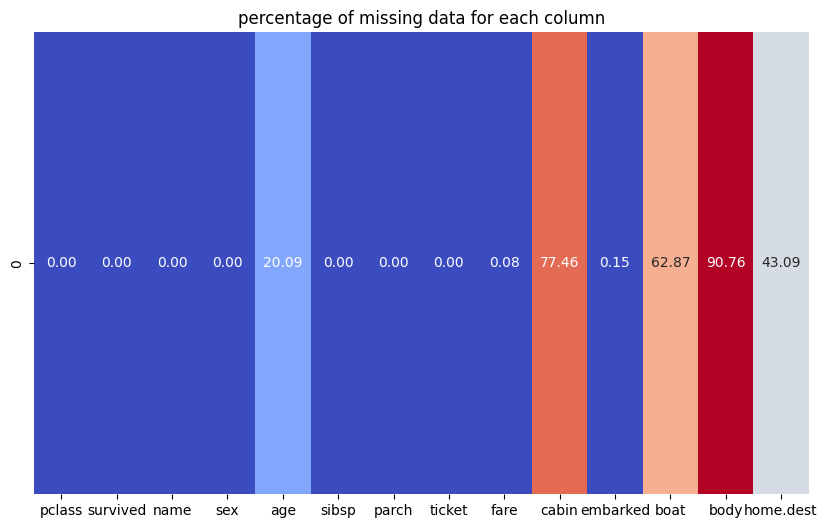

In [32]:
# visualizing missing data by percentage
plt.figure(figsize=(10,6))
missing_data = df.isnull().mean().to_frame().T * 100  # Convert to percentage
sns.heatmap(missing_data, annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title("percentage of missing data for each column")
plt.show()




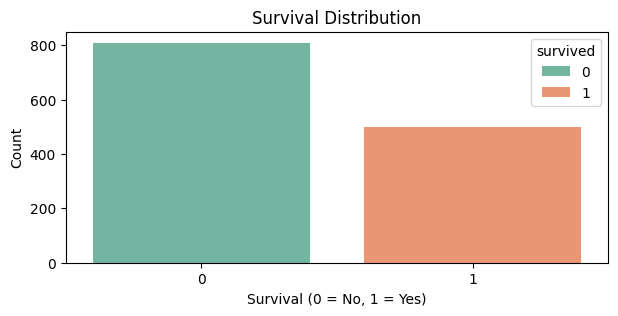

In [33]:
# Visualizing survivors
plt.figure(figsize=(7,3))
sns.countplot(data=df, x="survived", hue="survived", palette="Set2")  # Added hue="survived"
plt.title("Survival Distribution")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


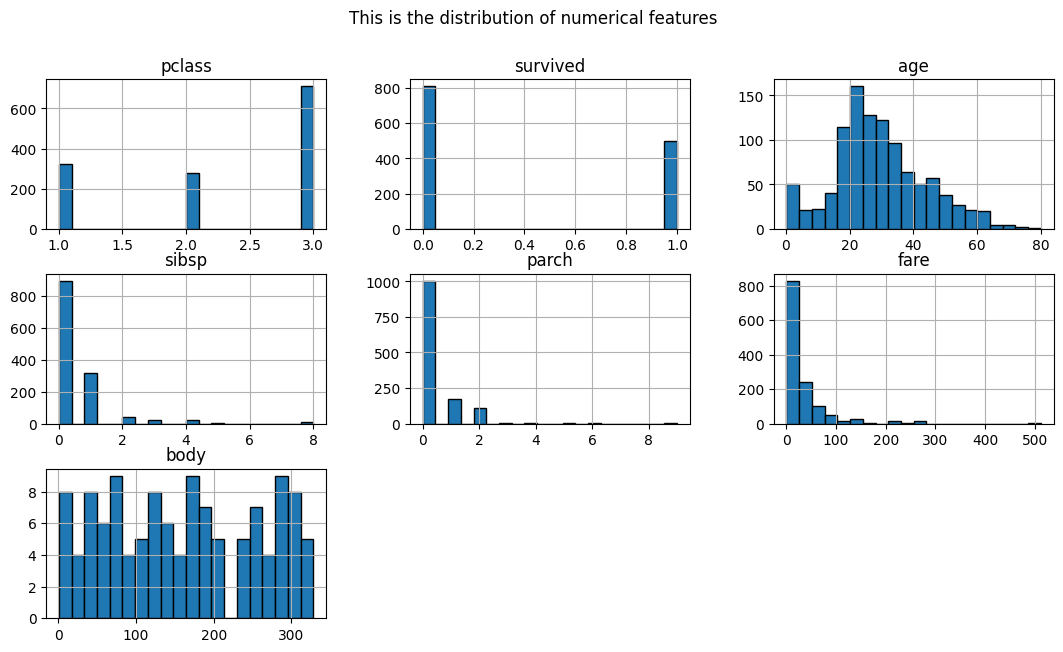

In [25]:
# numerical features as histograms
df.hist(figsize=(13,7), bins=20, edgecolor="black")
plt.suptitle("This is the distribution of numerical features")
plt.show()


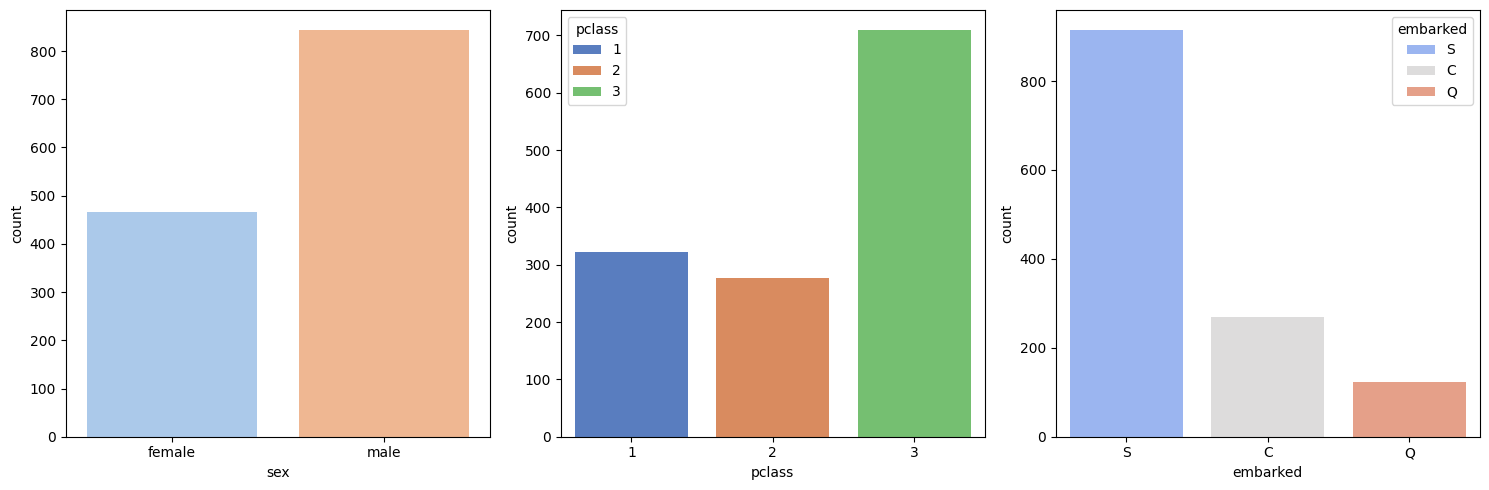

In [28]:
# plots for categorical features ( sex, class and embarking)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=df, x="sex", ax=axes[0], hue="sex", palette="pastel")
sns.countplot(data=df, x="pclass", ax=axes[1], hue="pclass", palette="muted")
sns.countplot(data=df, x="embarked", ax=axes[2], hue="embarked", palette="coolwarm")

plt.tight_layout()
plt.show()


Observations

We have done our initial exploration of the data of both our numerical and categorical values. We will now go onto the second task which is taking care of the missing values. The columns that contain the most missing variables are cabin, boat and body so these are the ones we will take a closer look at.



TASK 2

Managing Missing Variables

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_data = pd.DataFrame({
    'missing values': missing_values,
    'percentages': missing_percent
})

# Display only columns with missing values
missing_data = missing_data[missing_data["missing values"] > 0]
missing_data


,missing values,percentages
age,263,20.091673
fare,1,0.076394
cabin,1014,77.463713
embarked,2,0.152788
boat,823,62.872422
body,1188,90.756303
home.dest,564,43.086325


In [61]:
# decided to drop 'Cabin', 'Boat', and 'Body' since over 60% of their values are missing
df.drop(columns=['Cabin', 'Boat', 'Body'], inplace=True, errors="ignore")


In [62]:
# filling in missing values in 'Age' and 'Fare' with the median
df = df.fillna({'age': df['age'].median(), 'fare': df['fare'].median()})


In [63]:
# Fill missing values in 'Embarked' with the most frequent value (mode)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [66]:
#dropping "Home Destination" since it has a lot of missing values but does not relate to survival prediction
df.drop(columns=['home.dest'], inplace=True, errors="ignore")


In [67]:
# Confirming there are no missing values left
print("Missing values after handling:")
print(df.isnull().sum().sum())  # will print 0 if not mssing values are left


Missing values after handling:
0


TASK 5

Data Splitting

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['survived'])
y = df['survived']

# training 70% and others 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# validation 50% and testing 50%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"training set: {X_train.shape[0]} samples")
print(f"validation set: {X_val.shape[0]} samples")
print(f"test set: {X_test.shape[0]} samples")


training set: 916 samples
validation set: 196 samples
test set: 197 samples


TASK 3

Encoding Categorical Variables

In [69]:
# finding our categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("categorical columns:", categorical_columns)


categorical columns: Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')


In [72]:
# dropped name and ticket since they are not important in ssurvival prediction
df.drop(columns=['name', 'ticket'], inplace=True, errors="ignore")



In [79]:
# One-Hot encoding for categorical variables
categorical_columnss = ['sex', 'embarked', 'pclass']
categorical_columnss = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# showing first few rows to check encoding worked
df.head()


,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,1,29.0000,0,0,211.3375,False,False,True,False,False
1,1,0.9167,1,2,151.5500,True,False,True,False,False
2,0,2.0000,1,2,151.5500,False,False,True,False,False
3,0,30.0000,1,2,151.5500,True,False,True,False,False
4,0,25.0000,1,2,151.5500,False,False,True,False,False


In [81]:
#checking if encoding was a success
print("Dataset after encoding:")
print(df.head())

print("\nColumn types after encoding:")
print(df.dtypes)


Dataset after encoding:
   survived      age  sibsp  parch      fare  sex_male  embarked_Q  \
0         1  29.0000      0      0  211.3375     False       False   
1         1   0.9167      1      2  151.5500      True       False   
2         0   2.0000      1      2  151.5500     False       False   
3         0  30.0000      1      2  151.5500      True       False   
4         0  25.0000      1      2  151.5500     False       False   

   embarked_S  pclass_2  pclass_3  
0        True     False     False  
1        True     False     False  
2        True     False     False  
3        True     False     False  
4        True     False     False  

Column types after encoding:
survived        int64
age           float64
sibsp           int64
parch           int64
fare          float64
sex_male         bool
embarked_Q       bool
embarked_S       bool
pclass_2         bool
pclass_3         bool
dtype: object


TASK 4

Feature Scaling


 Addressing Class Imbalance






Feature Selection

